In [1]:
import psycopg2
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

In [2]:

def connect_to_pgsql():
    #establishing the connection
    conn = psycopg2.connect(
       database="comments", user='postgres', password='fart123', host='localhost', port= '5432'
    )
    #Creating a cursor object using the cursor() method
    cursor = conn.cursor()

    postgreSQL_select_Query = "select * from comments_better"

    #Executing an postgresql function using the execute() method
    cursor.execute(postgreSQL_select_Query)

    # Fetch a all row using fetchall() method.
#     print("Selecting rows from comments table using cursor.fetchall")
    d = cursor.fetchall()

    column_names = ['author', 'author_fullname', 'author_premium', 'body',
       'created_utc', 'id', 'link_id', 'parent_id', 'permalink', 'score',
       'subreddit', 'subreddit_id', 'total_awards_received',
       'contains_a_keyword', 'sentiment_value']
    
    
    # print("Connection established to: ",d)
    df = pd.DataFrame(data=d, columns = column_names)

    #Closing the connection
    conn.close()
    
    return df

In [3]:
df = connect_to_pgsql()


In [4]:
print(df.columns.tolist())

['author', 'author_fullname', 'author_premium', 'body', 'created_utc', 'id', 'link_id', 'parent_id', 'permalink', 'score', 'subreddit', 'subreddit_id', 'total_awards_received', 'contains_a_keyword', 'sentiment_value']


In [5]:
subreddit_list = ["JoeRogan", "walkaway", "ukraine", "conspiracy", "Coronavirus", 
                  "antiwork", "politics", "Conservative", "progressive", "Libertarian", "AskThe_Donald"]


def create_pie_chart(df, subreddit_list, flagged_comments_only): 
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    if flagged_comments_only:
        df = df.loc[df['contains_a_keyword'] == 1]

    labels = subreddit_list
    sizes = []
    
    for sub in labels:
#         print(sub)
        x = df.loc[df['subreddit'] == str(sub)]
        comments_per_sub = x.shape[0]
#         print(type(comments_per_sub))
        sizes.append(comments_per_sub)
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%', labeldistance=1.05)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()
    
    


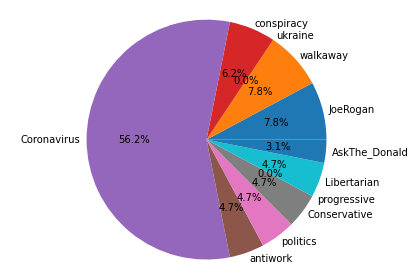

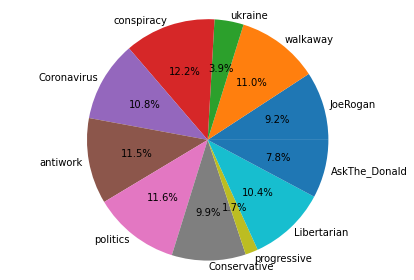

In [6]:
create_pie_chart(df, subreddit_list, True)
create_pie_chart(df, subreddit_list, False)

In [7]:
labels = df.loc[df['contains_a_keyword'] == 1]

In [8]:
print(labels.shape)

(64, 15)


In [9]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
def generate_wordcloud(df, flagged_comments_only):
    if flagged_comments_only:
        df = df.loc[df['contains_a_keyword'] == 1]
        
    # Start with one review:
    y = df.body
    text = " ".join(str(word) for word in y)
    
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

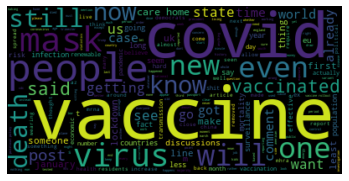

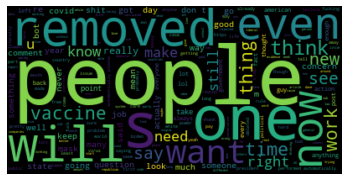

In [10]:
generate_wordcloud(df, True)
generate_wordcloud(df, False)

In [11]:
def show_average_upvotes_per_sub(df, subreddit_list, flagged_comments_only):
    
    if flagged_comments_only:
        df = df.loc[df['contains_a_keyword'] == 1]
        
    list_of_averages = []
    
    #get average upvote per sub
    for sub in subreddit_list:
        curr_sub = df.loc[df['subreddit'] == str(sub)]
        x = curr_sub["score"].mean()
        list_of_averages.append(x)
        
    #get ave of all subs    
    x = df['score'].mean()
    list_of_averages.append(x)
    
    
    # creating the dataset
    subreddit_list.append("all")

    fig = plt.figure(figsize=(15, 7))

    # creating the bar plot
    plt.bar(subreddit_list, list_of_averages, color ='maroon',
            width = 0.4)

    plt.xlabel("Subreddit")
    plt.ylabel("Ave. of Upvotes (score)")
    plt.title("Average Upvotes per Subreddit")
    plt.savefig("output.png")
    plt.show()

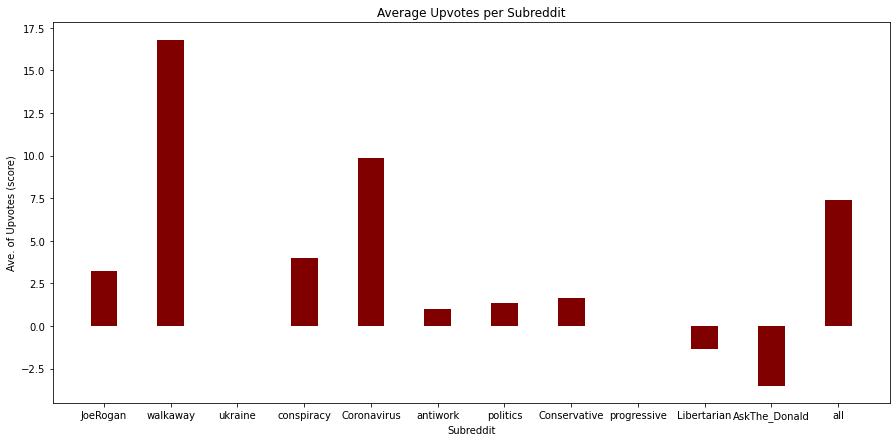

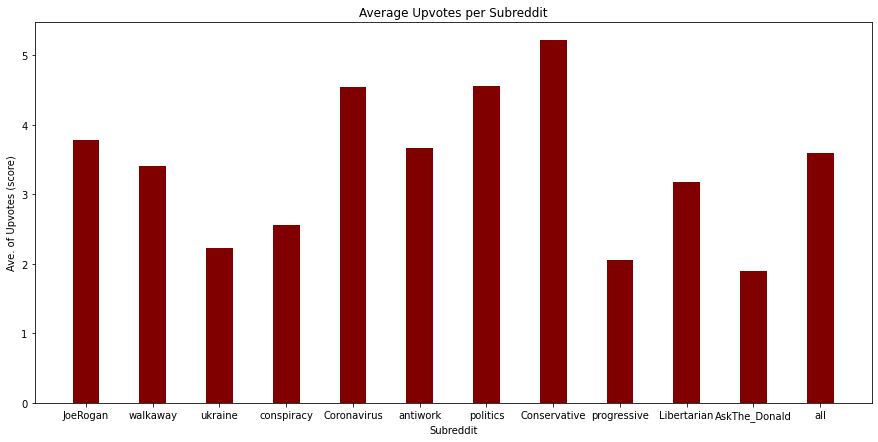

In [12]:
show_average_upvotes_per_sub(df, subreddit_list, True)
show_average_upvotes_per_sub(df, subreddit_list, False)

In [13]:
def create_timeseries(df):
    x = df['created_utc']
    y = df['contains_a_keyword']

    horizontal_stack = pd.concat([y, x], axis=1)

    
    sns.lineplot(data=horizontal_stack)
    
    

In [15]:
df.columns

Index(['author', 'author_fullname', 'author_premium', 'body', 'created_utc',
       'id', 'link_id', 'parent_id', 'permalink', 'score', 'subreddit',
       'subreddit_id', 'total_awards_received', 'contains_a_keyword',
       'sentiment_value'],
      dtype='object')

In [67]:
def create_sentiment_analysis_barchart(df, flagged_comments_only):
    
    if flagged_comments_only:
        df = df.loc[df['contains_a_keyword'] == 1]
        
    value = df['sentiment_value']
    
    pos_count = 0
    neg_count = 0
    nuetral_count = 0
    
    for v in value:
        if v > 0:
            pos_count = pos_count +1
        elif v < 0:
            neg_count = neg_count + 1
        else:
            nuetral_count = nuetral_count + 1
    
#     print(pos_count, neg_count, nuetral_count)
    
    count_list = [neg_count, nuetral_count, pos_count]
    labels = ["Negative", "Neutral", "Positive"]
    
    # creating the bar plot
    plt.bar(labels, count_list, color ='green',
            width = 0.4)

    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title("Number of Positive, Negative, and Neutral Posts in the Dataset")
#     plt.savefig("output.png")
    plt.show()
    

26 27 11


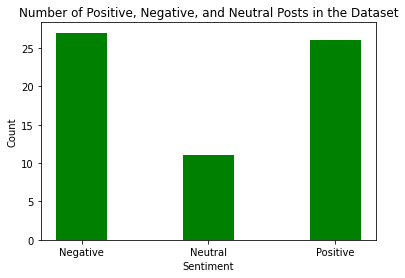

339 253 408


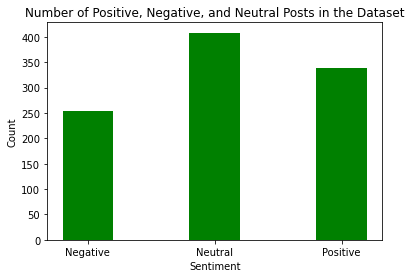

In [66]:
create_sentiment_analysis_barchart(df, True)
create_sentiment_analysis_barchart(df, False)

In [39]:
bruh = df.loc[df['contains_a_keyword'] == 1]
print(bruh.shape)

(64, 15)


In [47]:
bruh['sentiment_value']

3      0.000000
17     0.200000
33    -0.002653
81    -0.104167
85     0.025000
         ...   
914   -0.086957
918    0.114286
971   -0.086957
977    0.125000
980   -0.020408
Name: sentiment_value, Length: 64, dtype: float64

In [41]:
bruh.columns

Index(['author', 'author_fullname', 'author_premium', 'body', 'created_utc',
       'id', 'link_id', 'parent_id', 'permalink', 'score', 'subreddit',
       'subreddit_id', 'total_awards_received', 'contains_a_keyword',
       'sentiment_value'],
      dtype='object')